## PDFtoExcelTableConverter for Halstead-Reitan Neuropsychological Battery

The Halstead-Reitan Neuropsychological Test Battery and allied procedures is a comprehensive suite of neuropsychological tests used to assess the condition and functioning of the brain, including etiology, type, localization and lateralization of brain injury. [See the wikipedia link for more information]

https://en.wikipedia.org/wiki/Halstead-Reitan_Neuropsychological_Battery

My sister administers tests from the Halstead-Reitan Neuropsychological Battery for work. The book, _Revised Comprehensive Norms for an Expanded Halstead-Reitan Battery: Demographically Adjusted Neuropsychological Norms for African American and Caucasian Adults_ by Robert K. Heaton, PhD, ABPP, S. Walden Miller, PhD, Michael J. Taylor, PhD, and Igor Grant, MD provides a normative system that assists in interpreting test data. At work, her and her colleagues use the physical book to access tabulated scores. The process of scoring was repetitive and time consuming so she decided to export the tables from a PDF copy of the book to EXCEL and then automate the scoring process!

She wanted to export four tables from one of the Appendices, each with thousands of values, but copying and pasting values was __tedious__ and __time-consuming__. She asked me to figure out a **_systematic_** way to export tables to an excel file that is fast and not mistake prone. 

###### Her determination for this showed that medicine can benefit if information is digitized correctly because it can expedite diagnostic results without errors.

This code is my approach to converting the following table from PDF to Excel using 8 steps.

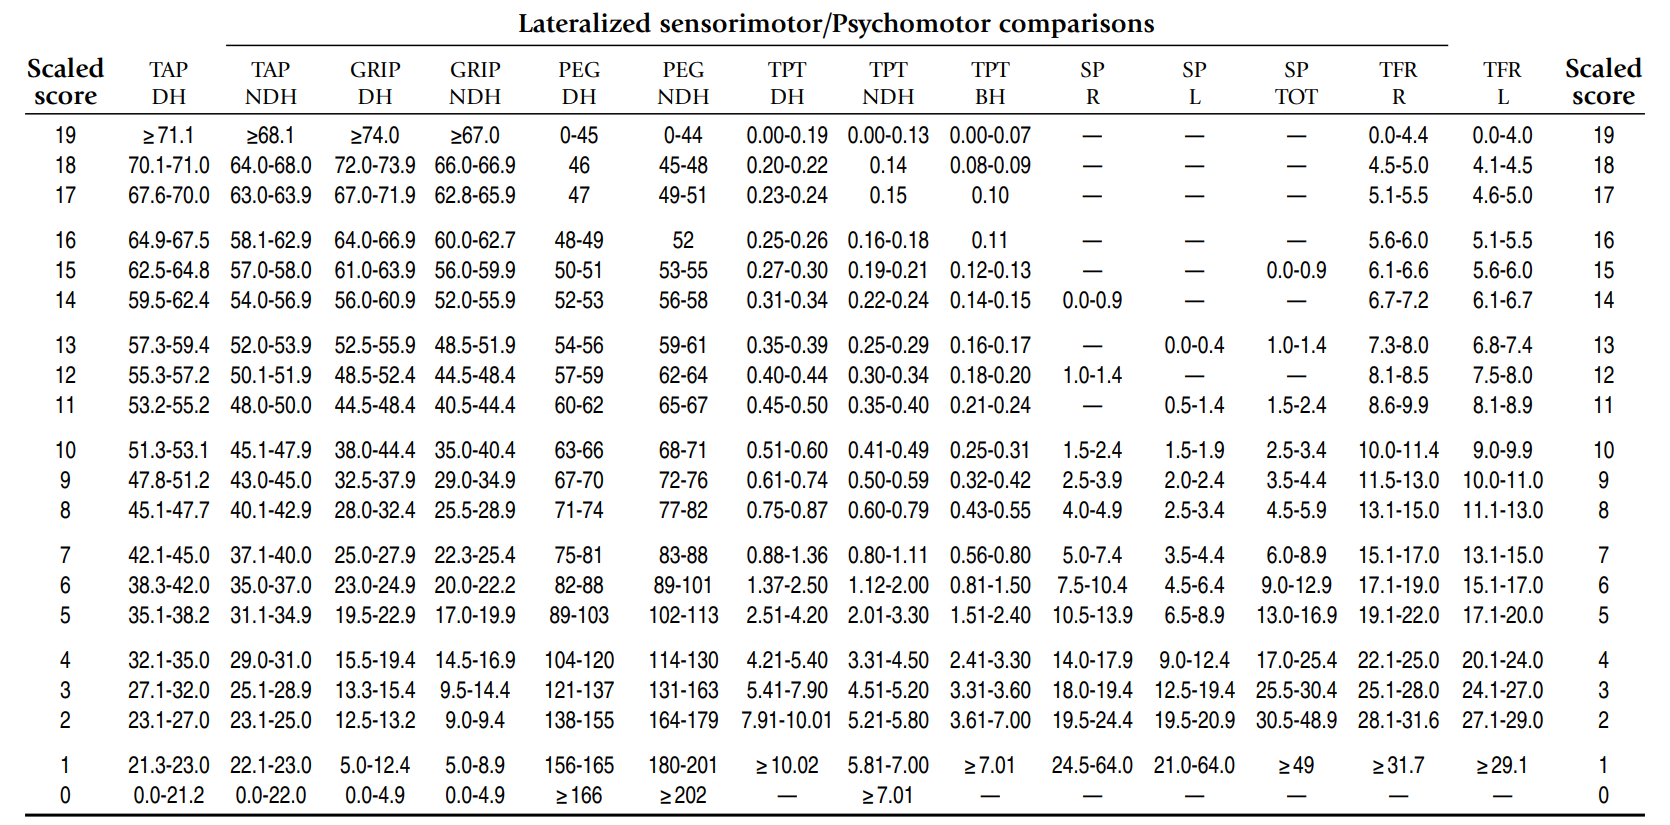

Step 1: Import libraries

In [1]:
#Code extracts information from a PDF and cleans it up
import pandas as pd
import PyPDF2
import numpy as np

C:\Users\Reshma Brown\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


Step 2: Read pdf copy of Halstead-Reitan Neuropsychological Battery using pyPDF2

*After opening the PDF, the code returns the number of pages in the book and the number of lines in page 94, where the table is located.*

In [2]:
#Extracts Table out of PDF
pdfFileObj = open('Robert K. Heaton, S. Walden Miller, Michael J. Taylor, and Igor Grant - Revised Comprehensive Norms for an Expanded Halstead-Reitan Battery_ Demographically Adjusted Neuropsychological Norms for Afric.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
print("The Halstead-Reitan Neuropsychological Battery has", pdfReader.numPages, "pages.") #Returns page count
pageObj = pdfReader.getPage(94)#Looks at contents of page 94
Fulltext  = pageObj.extractText() #Stores page 94  in a local variable
print("Page 94 has a total of", Fulltext.count('\n'), "lines.") #Returns the number of lines in the page


The Halstead-Reitan Neuropsychological Battery has 645 pages.
Page 94 has a total of 36 lines.


Step 3: Print out page

*Printing out page 94 gives perspective of how the information is interpreted by the reader. Some items are being misinterpreted, this is why copying and pasting the table to excel is not as simple as it should be. Page 94 has two tables, but we will export the second table, shown in lines 21 to 35.*

Some problems with interpretation:
 - Occassionally, two rows  are combined into one line (so there are 2X as many items in one line!)
 - Some equality signs, like "≥", are interpreted as its own item
 - For other tables, the "---" are interpreted as "————" instead, shortening the number of items in each line

In [3]:
print(Fulltext) #Returns Fulltext

Verbal episodic memory Visual episodic memory
Scaled STORY- STORY STORY STORY CVLT- CVLT- CVLT- TPT TPT FIGUR- FIGUR FIGUR FIGUR Scaled
score T1 LEARN RECALL LOSS CVLT-1 CVLT-5 TOT SDFR LDFR MEM LOC T1 LEARN RECALL LOSS score
19 ≥ 31.1 — ≥ 29.1 — 15-16 — 77-80 — — — 10 ≥ 22 ≥ 21.00 ≥ 22 — 19
18 28.1-31.0 ≥ 29.00 28.1-29.0 — — — 75-76 — — — 9 21 20.00-20.99 21 — 1817 26.1-28.0 28.00-28.99 24.6-28.0 — 13-14 — 71-74 — — 10 — 20 — 20 — 17
16 24.1-26.0 26.00-27.99 23.1-24.5 — — 16 70 16 16 — — 19 19.00-19.99 19 — 16
15 22.1-24.0 24.00-25.99 21.1-23.0 — 12 — 67-69 15 — — 8 ———— 1 5
14 20.6-22.0 22.00-23.99 20.1-21.0 0.00-2.60 11 15 64-66 14 15 — 7 18 18.00-18.99 18 — 14
13 18.6-20.5 20.00-21.99 19.1-20.0 — 10 — 62-63 13 — 9 — 17 17.00-17.99 17 0.00 13
12 17.1-18.5 18.50-19.99 18.1-19.0 2.61-4.17 9 14 59-61 12 14 — 6 16 16.00-16.99 — 0.01-5.54 1211 15.1-17.0 17.00-18.49 16.6-18.0 4.18-7.77 8 13 54-58 11 13 8 5 15 15.00-15.99 16 5.55-5.79 11
10 12.6-15.0 11.00-16.99 15.1-16.5 7.78-10.64 7 12 4

Step 4: Address interpretation issues in lines 21 to 35.

*First each line in the text was converted to an item in a list. Then lines 21 to 35 were split using spaces. Each line from the pdf was edited using a series of if statements to address the symbol-related issues in the interpretation.*


In [4]:
lines = Fulltext.split("\n") #Splits Fulltext and makes it a list

df = []
for h in range(21,35): 
    line1 = lines[h]
    split_line1 = line1.split(" ")

    j = 0
    for i in split_line1:
        if i == '≥' or i == '≤':
            res = split_line1[j] + split_line1[j + 1]
            split_line1[j] = res
            split_line1.pop(j+1)
        
        if "——" in i:
            dash_index = split_line1.index(i)
            dashes = list(split_line1[dash_index])
            for k in dashes:
                split_line1.insert(dash_index, k)
            split_line1.pop(dash_index+len(dashes))
        j+=1
    df.append(split_line1)
    


Step 5: Address the combined rows

*The if statements have not fixed the fact that some rows on the table were combined during the interpretation. This is seen by printing out the number of values in each row for the current data frame.*

In [5]:
print("Number of values in each row:")
for f in df:
        print(len(f))       

Number of values in each row:
16
31
16
31
16
31
16
31
16
31
16
31
16
16


*The rows that merged have 31 values because the final value of the first row and the first value of the second row was combined. The code below is an if statement that separates the lines and saves the edit in a copy of the data frame (df_copy). The code also ensures that the first and last line of each row are the same. Printing the number of values of each row verifies that we have the same amount of items in each row, which indicates our readiness to export the table to excel*

In [6]:
df_copy = df
#print(df_copy)
for g in df:
    if len(g) == 31:
        df_index = df.index(g)
        df_index_1 = df_index+ 1
        g1 = g[:16]
        g2 = g[-16:]
        s = g[15]
        s1 = s[:len(s)//2]
        g1[15] = s1
        s2 = s[len(s)//2:]
        g2[0] = s2
        new_lines = [g1, g2]
        df_copy.insert(df_index, new_lines[1])
        df_copy.insert(df_index, new_lines[0])
        df_copy.pop(df_index+2)

for g in df_copy:
    if g[-1] != g[0]:
        g[-1] = g[0]
        g.pop(-2)
print("Number of values in each row:")        
for g in df_copy:
    print(len(g))

Number of values in each row:
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


Step 6: Add column names to the data frame

*The pdf was referenced to obtain the column names for this data base.*

In [7]:
toe = pd.DataFrame(df_copy, columns=['SCALED SCORE',
                                     'TAP DH',
                                     'TAP NDH',
                                     'GRIP DH',
                                     'GRIP NDH',
                                     'PEG DH',
                                     'PEG NDH',
                                     'TPT DH',
                                     'TPT NDH',
                                     'TPT BH',
                                     'SP R',
                                     'SP L',
                                     'SP TOT',
                                     'TFR R',
                                     'TFR L',
                                     'SCALED SCORE',                       
                                    ] )


Step 7: Check Dataframe

*The Jupyter Notebook can display the dataframe. The dataframe and the table from the pdf look exactly the same! We are ready to export the table to excel.*

In [8]:
toe

,SCALED SCORE,TAP DH,TAP NDH,GRIP DH,GRIP NDH,PEG DH,PEG NDH,TPT DH,TPT NDH,TPT BH,SP R,SP L,SP TOT,TFR R,TFR L,SCALED SCORE
0,19,≥71.1,≥68.1,≥74.0,≥67.0,0-45,0-44,0.00-0.19,0.00-0.13,0.00-0.07,—,—,—,0.0-4.4,0.0-4.0,19
1,18,70.1-71.0,64.0-68.0,72.0-73.9,66.0-66.9,46,45-48,0.20-0.22,0.14,0.08-0.09,—,—,—,4.5-5.0,4.1-4.5,18
2,17,67.6-70.0,63.0-63.9,67.0-71.9,62.8-65.9,47,49-51,0.23-0.24,0.15,0.10,—,—,—,5.1-5.5,4.6-5.0,17
3,16,64.9-67.5,58.1-62.9,64.0-66.9,60.0-62.7,48-49,52,0.25-0.26,0.16-0.18,0.11,—,—,—,5.6-6.0,5.1-5.5,16
4,15,62.5-64.8,57.0-58.0,61.0-63.9,56.0-59.9,50-51,53-55,0.27-0.30,0.19-0.21,0.12-0.13,—,—,0.0-0.9,6.1-6.6,5.6-6.0,15
5,14,59.5-62.4,54.0-56.9,56.0-60.9,52.0-55.9,52-53,56-58,0.31-0.34,0.22-0.24,0.14-0.15,0.0-0.9,—,—,6.7-7.2,6.1-6.7,14
6,13,57.3-59.4,52.0-53.9,52.5-55.9,48.5-51.9,54-56,59-61,0.35-0.39,0.25-0.29,0.16-0.17,—,0.0-0.4,1.0-1.4,7.3-8.0,6.8-7.4,13
7,12,55.3-57.2,50.1-51.9,48.5-52.4,44.5-48.4,57-59,62-64,0.40-0.44,0.30-0.34,0.18-0.20,1.0-1.4,—,—,8.1-8.5,7.5-8.0,12
8,11,53.2-55.2,48.0-50.0,44.5-48.4,40.5-44.4,60-62,65-67,0.45-0.50,0.35-0.40,0.21-0.24,—,0.5-1.4,1.5-2.4,8.6-9.9,8.1-8.9,11
9,10,51.3-53.1,45.1-47.9,38.0-44.4,35.0-40.4,63-66,68-71,0.51-0.60,0.41-0.49,0.25-0.31,1.5-2.4,1.5-1.9,2.5-3.4,10.0-11.4,9.0-9.9,10


Step 8: Export the dataframe to excel

*Here the index was removed and header was included as the column names. The excel sheet was exported to the same directory as this code in a file called "Appendix C4.xlsx"*

In all, this is a step-by-step on how to fix and export a table from pdf to excel. The systematic method was **repeatable** for all of the tables in the Appendix with little modification to the code. To repeat these steps for other tables, the page number, range of lines, column names, and excel file name needed to be modified.

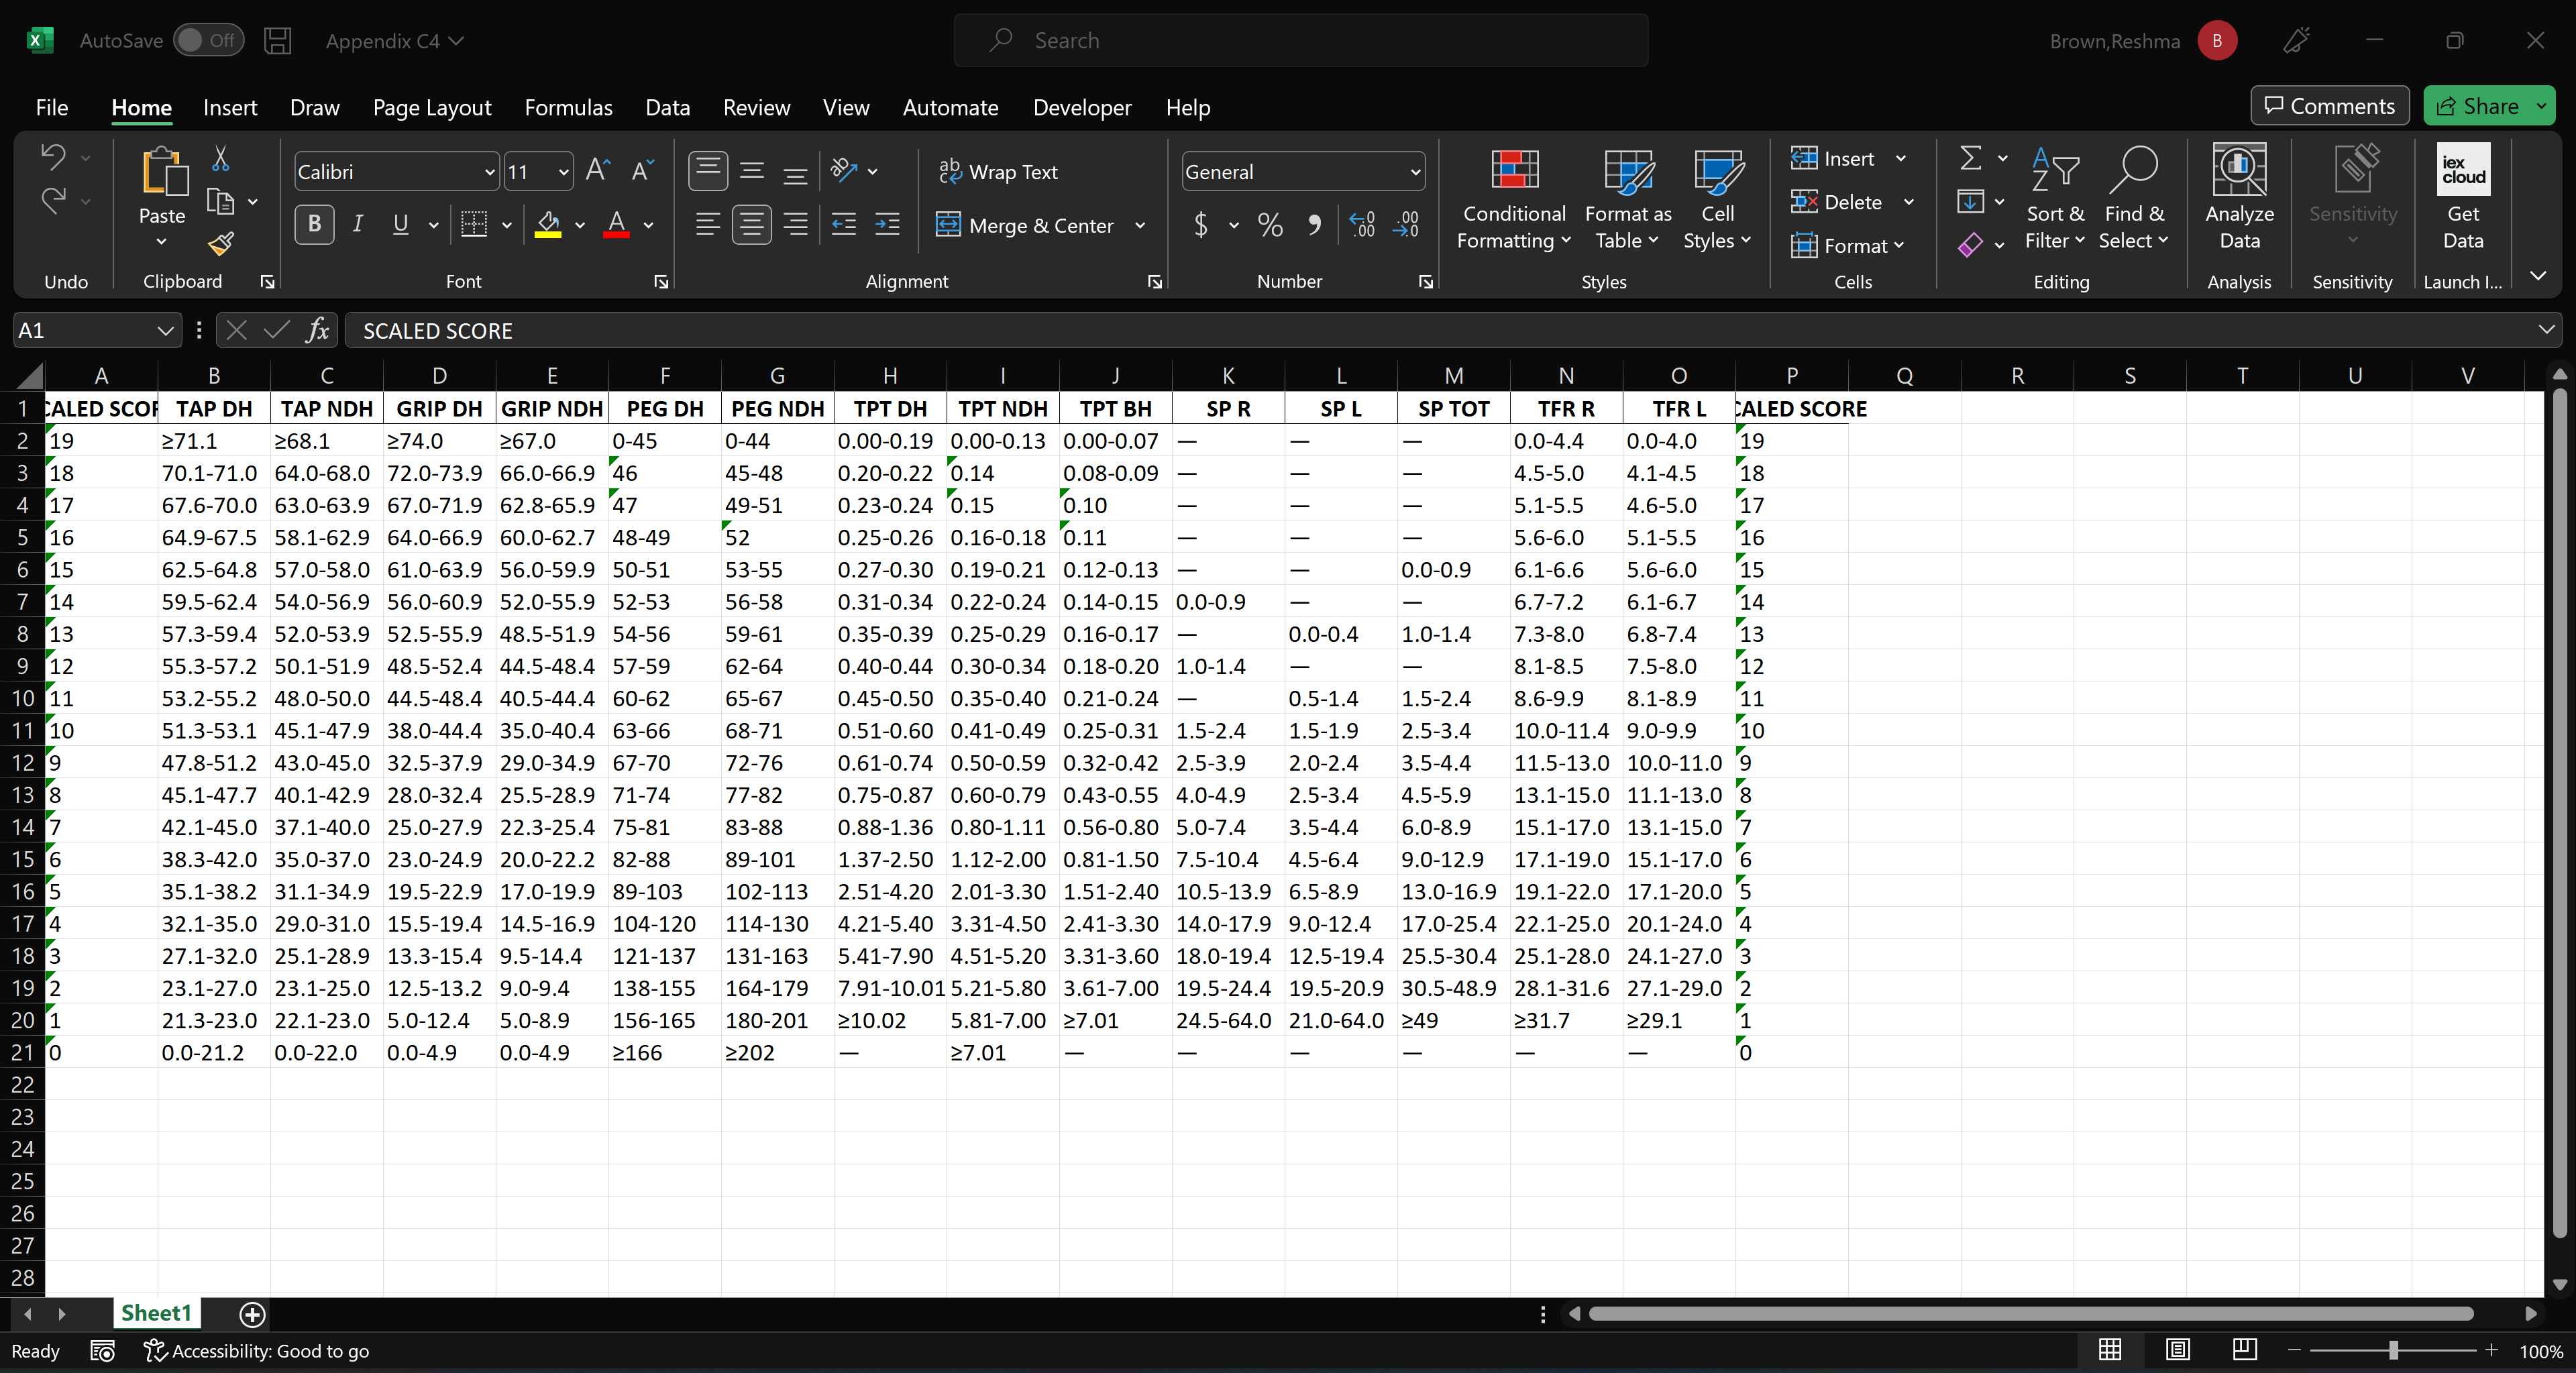

In [9]:
toe.to_excel (r'Appendix C4.xlsx', index = False, header=True)